<a href="https://colab.research.google.com/github/Katinon/Self-Study/blob/main/%ED%98%BC%EC%9E%90-%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%94%A5%EB%9F%AC%EB%8B%9D/03_DataPretreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight)) #튜플로 전달, 리스트 세로로 붙이기
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #리스트 가로로 붙이기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)
#처음 두개는 입력 데이터, 나중 두개는 타깃 데이터, 25%가 테스트 세트로 반환
#무작위로 데이터를 나누었을 때 샘플링 편향이 나타날 수 있어 stratify매개변수에 타깃 데이터 전달

test_target
#테스트 비율이 2.25:1로, 35:14 = 2.5:1 과 비슷함

array([1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print(kn.predict([[25, 50]])) #실제로는 도미인데 빙어로 예측

[0.]


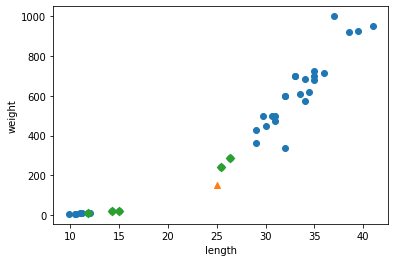

In [11]:
import matplotlib.pyplot as plt

distance, indexes = kn.kneighbors([[25,150]])
#가장 가까운 이웃을 찾아주는 kneighbors 메서드
#이웃까지의 거리, 이웃까지의 index 5개 반환

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#산점도로 그린 결과 도미에 더 가깝지만 
#빙어에 가까운 이웃이 더 많아 훈련모델은 빙어로 예측

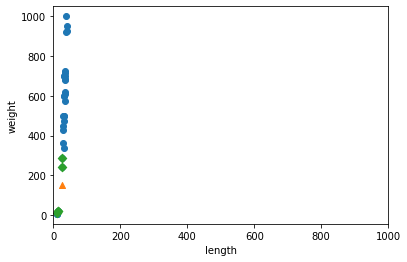

In [13]:
# x축은 범위가 좁고, y축은 범위가 넓기 때문에 scale이 다름
#실제로 점 사이의 거리는 빙어와 가까운 것이 더 많아 빙어로 예측

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# x축과 y축의 범위를 동일하게 맞춤
# 생선의 길이에 상관없이 무게가 고려대상임을 알 수 있음
# =>특성값을 일정한 기준으로 맞추어야 함

In [ ]:
mean = np.mean(train_input, axis=0) #평균
std = np.std(train_input, axis=0) #표준편차
train_scaled = (train_input - mean) / std #표준점수

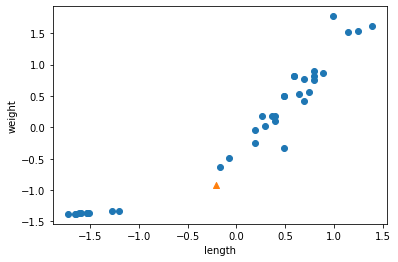

In [15]:
#표준점수로 변환하여 산점도로 그리기
new = ([25, 150] - mean) / std #샘플 표준점수로 변환
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
#표준점수로 모델 훈련
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std #테스트 세트도 표준점수로 변환
kn.score(test_scaled, test_target) #정확도 측정

kn.predict([[25,50]]) #이제 도미로 예측

array([1.])

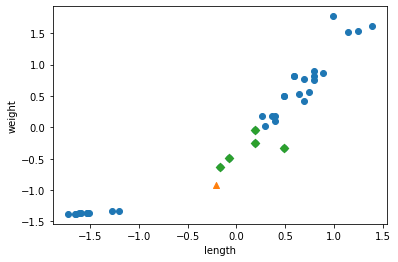

In [19]:
#샘플과 가장 가까운 이웃이 변화
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()